# Pymaceuticals Inc.
---

### Analysis

-The Drug Regimen Capomulin has the maximum mice number (230), and Zoniferol has the smaller mice number (182).
-The total number of unique mice are 248. 
-The total number of female mice are 124 and male mice are125 .
-The correlation between mouse weight, and average tumor volume is 0.84. It displays a positive correlation, the mouse weight is proportional to average tumor volume.
-From the regression analysis, it is derived that the average tumor volume (dependent variable) effects when weight of mice is varied(independent variables). 
-The R-squared value is 0.70, which means 70% the model fit the data, wich is fairely good to predict the data from the model. --Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model explains all of the variation in the response variable around its mean.

 

In [4]:
# Dependencies and Setup
#%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
# Display the data table for preview
combined_data.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mice_count = len(combined_data["Mouse ID"].unique())
mice_count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_values = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_values

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseid = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mouseid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean =combined_data[combined_data["Mouse ID"].isin(duplicate_values)==False]
df_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
df_clean_mice = df_clean["Mouse ID"].nunique()
df_clean_mice


248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#df_clean_mice.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = df_clean['Tumor Volume (mm3)'].groupby(df_clean['Drug Regimen']).mean()
median = df_clean['Tumor Volume (mm3)'].groupby(df_clean['Drug Regimen']).median()
variance = df_clean['Tumor Volume (mm3)'].groupby(df_clean['Drug Regimen']).var()
std_dev = df_clean['Tumor Volume (mm3)'].groupby(df_clean['Drug Regimen']).std()
sem = df_clean['Tumor Volume (mm3)'].groupby(df_clean['Drug Regimen']).sem()

summary_df = pd.DataFrame({"Mean Tumor Volume" : mean,
                          "Median Tumor Volume" : median,
                          "Tumor Volume Variance" : variance,
                          "Tumor Volume Std. Dev." : std_dev,
                          "Tumor Volume Std. Err." : sem})

summary_df
 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats = df_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

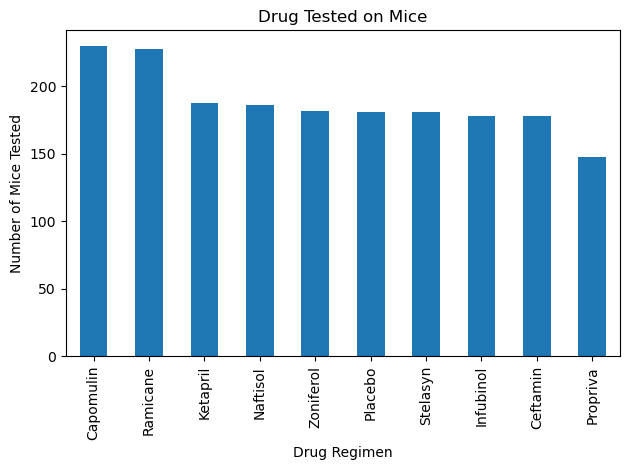

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_tested_drugs = df_clean["Drug Regimen"].value_counts()
mice_tested_drugs.plot.bar()
plt.title("Drug Tested on Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()

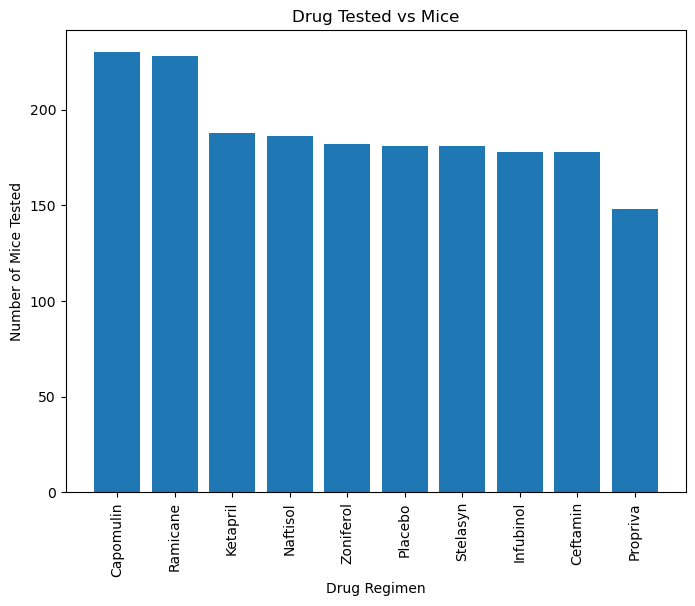

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis= np.arange(len(mice_tested_drugs))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,6))
plt.bar(x_axis, mice_tested_drugs)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Placebo","Stelasyn","Infubinol","Ceftamin","Propriva"],rotation="vertical")
plt.title("Drug Tested vs Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()



<AxesSubplot:ylabel='Sex'>

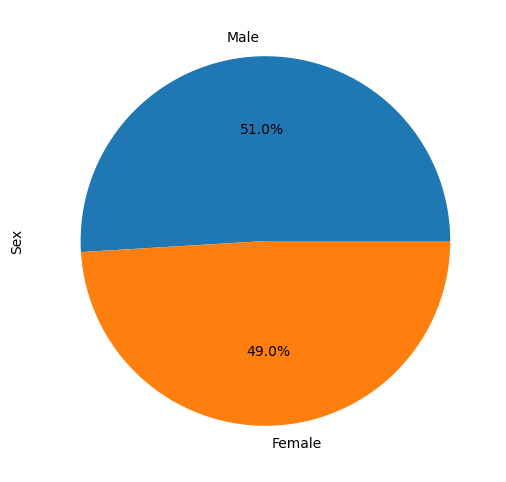

In [14]:
%matplotlib inline
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender = df_clean["Sex"].value_counts()

mice_gender.plot.pie(figsize=(6, 6),autopct='%1.1f%%')




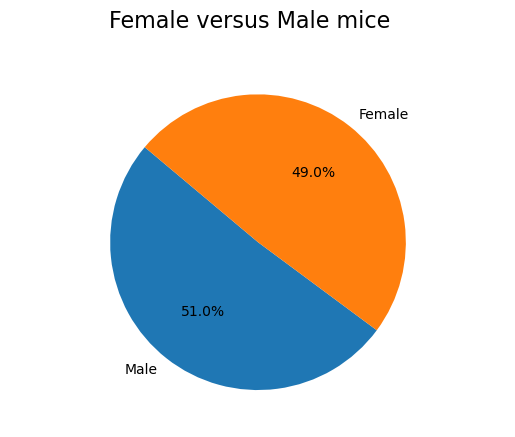

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels = ["Male", "Female"]
sizes = mice_gender.tolist()
colors = ["blue","red"]
plt.axis("equal")
plt.suptitle('Female versus Male mice', fontsize=16)
plt.pie(sizes, labels=labels,autopct="%1.1f%%", shadow = False, startangle=140)
plt.show()



In [18]:
df_clean.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse


mouse_max = df_clean.groupby('Mouse ID')['Timepoint'].max().reset_index().rename(columns={'Timepoint': 'greatest Timepoint'})

# Merge max timepoint onto data_df
mouse_max_df = pd.merge(df_clean, mouse_max, on='Mouse ID')
mouse_max_df.head()
    
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,greatest Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
all_volumes = []
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for med in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    med_max = mouse_max_df[(mouse_max_df["Drug Regimen"] == med) ].sort_values(by="Tumor Volume (mm3)", ascending=False)
    #print(med_max.head())
    temp_volumes = med_max['Tumor Volume (mm3)']
    all_volumes.append(temp_volumes)
    quartiles = med_max["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # add subset 
    print(f'Lower Bound for {med}: {lower_bound}')
    print(f'Upper Bound for {med}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (temp_volumes.loc[(med_max['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (med_max['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'{med} outliers: {outliers_count}')

    
    # Determine outliers using upper and lower bounds
    

Lower Bound for Capomulin: 26.714832162499995
Upper Bound for Capomulin: 55.9711007025
Capomulin outliers: 2
Lower Bound for Ramicane: 24.1865864625
Upper Bound for Ramicane: 57.488048122500004
Ramicane outliers: 1
Lower Bound for Infubinol: 32.309217298749985
Upper Bound for Infubinol: 72.31757996875001
Infubinol outliers: 0
Lower Bound for Ceftamin: 32.81891142624998
Upper Bound for Ceftamin: 71.19095325625001
Ceftamin outliers: 0


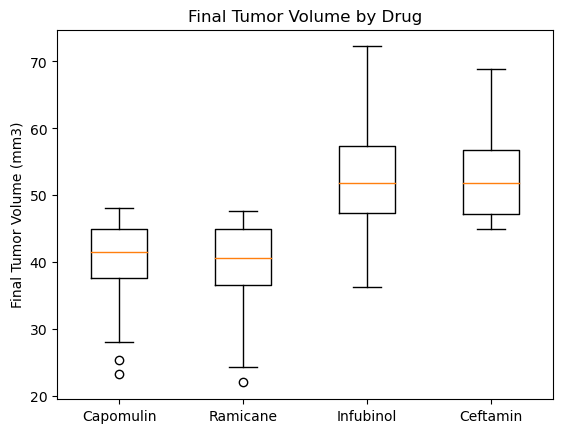

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

plt.boxplot(all_volumes)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse s185')

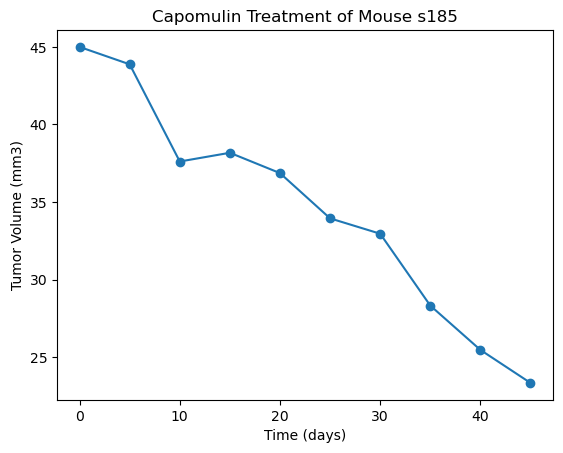

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = df_clean.loc[df_clean['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'],marker='o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")




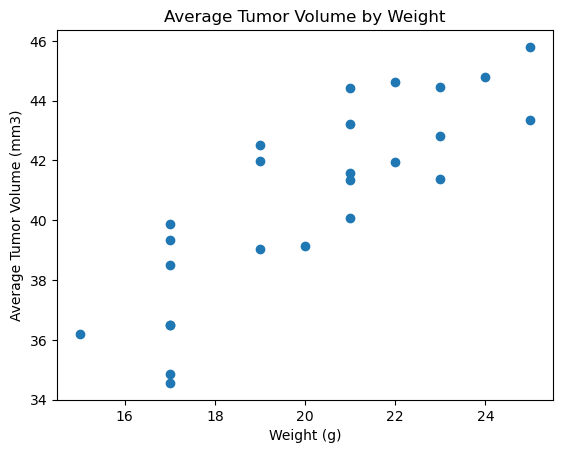

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = df_clean.loc[df_clean['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['Average Tumor Volume']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()


## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


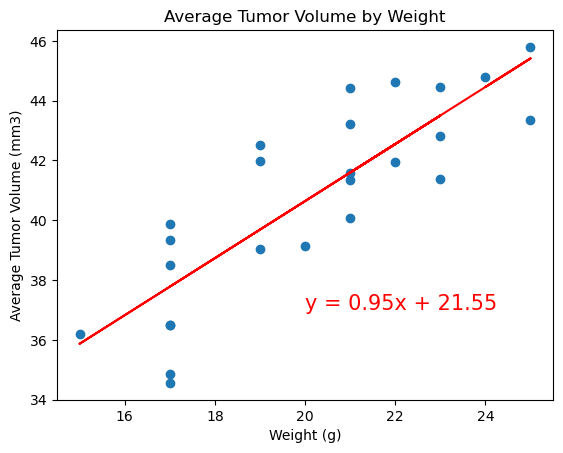

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Duplicate code for scatter plot from above:
final_avg_vol_df = avg_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['Average Tumor Volume']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()